<h1> Feature Selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# get embedding features
embedding_df = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/sent_embedding_features.csv', index_col=None)

In [ ]:
# get non-embedded feature train
non_embedded_train_df = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/train_non_embedded.csv', index_col=None)

In [ ]:
# train test split on embedding features
X_train_embedded, X_test_embedded, y_train, y_test = train_test_split(embedding_df, embedding_df, test_size=0.2, random_state=42)

In [ ]:
X_train_embedded = X_train_embedded.reset_index()
X_test_embedded = X_test_embedded.reset_index()

In [ ]:
X_train_non_embedded = non_embedded_train_df.drop(columns=['fraudulent'])

In [ ]:
X_train = pd.concat([X_train_non_embedded, X_train_embedded], axis=1)

In [ ]:
y_train = non_embedded_train_df[['fraudulent']]

In [ ]:
X_y_train = pd.concat([non_embedded_train_df, X_train_embedded], axis=1)

In [ ]:
# Calculate the correlation between each feature and the target
correlation_embedded_df = pd.DataFrame(list(X_train_embedded.apply(lambda col: col.corr(y_train['fraudulent'])).items()), columns=['Feature', 'Correlation'])
correlation_embedded_df['abs_correlation'] = correlation_embedded_df['Correlation'].abs()
# Sort the DataFrame by correlation values in descending order
correlation_embedded_df = correlation_embedded_df.sort_values(by='abs_correlation', ascending=False)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores for all features
mutual_info_scores = mutual_info_classif(X_train, y_train)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': mutual_info_scores})

# Sort features by their importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

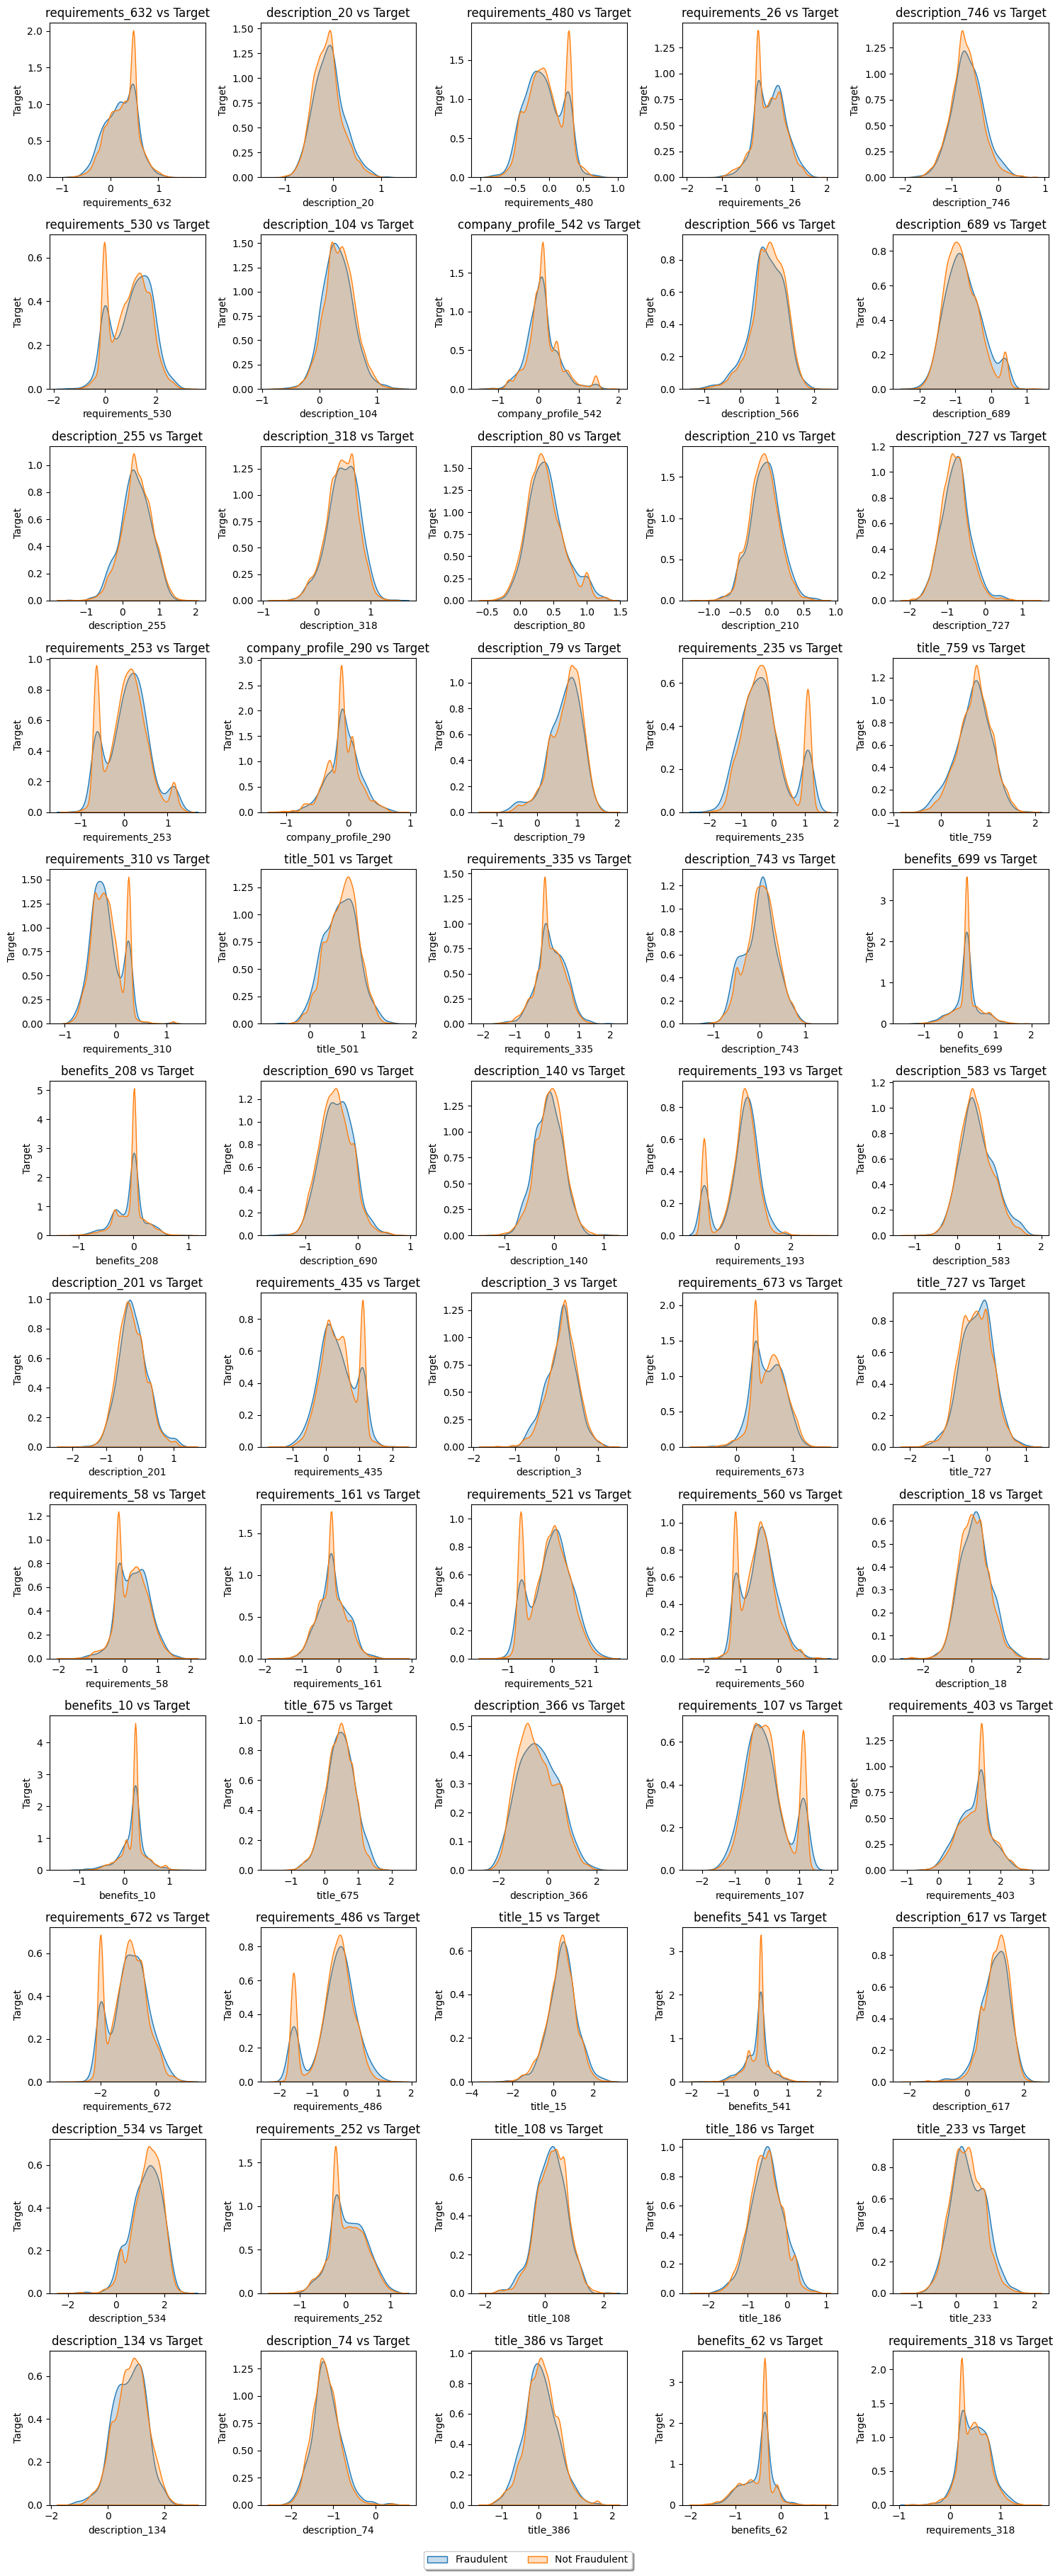

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = correlation_embedded_df[0:60]['Feature']
num_plots = len(features_to_plot)
num_rows = (num_plots + 4) // 5  # 5 plots in each row

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting
for i, feature in enumerate(features_to_plot):
    sns.kdeplot(X_y_train[X_y_train['fraudulent'] == 1][feature], fill=True, ax=axes[i], label='Fraudulent')
    sns.kdeplot(X_y_train[X_y_train['fraudulent'] == 0][feature], fill=True, ax=axes[i], label='Not Fraudulent')

    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

# Remove empty subplots
for j in range(num_plots, num_rows * 5):
    fig.delaxes(axes[j])

# Get handles and labels for all subplots
handles, labels = axes[0].get_legend_handles_labels()

# Create a single legend for all subplots using the handles and labels from the first subplot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=2)

plt.tight_layout()
plt.show()


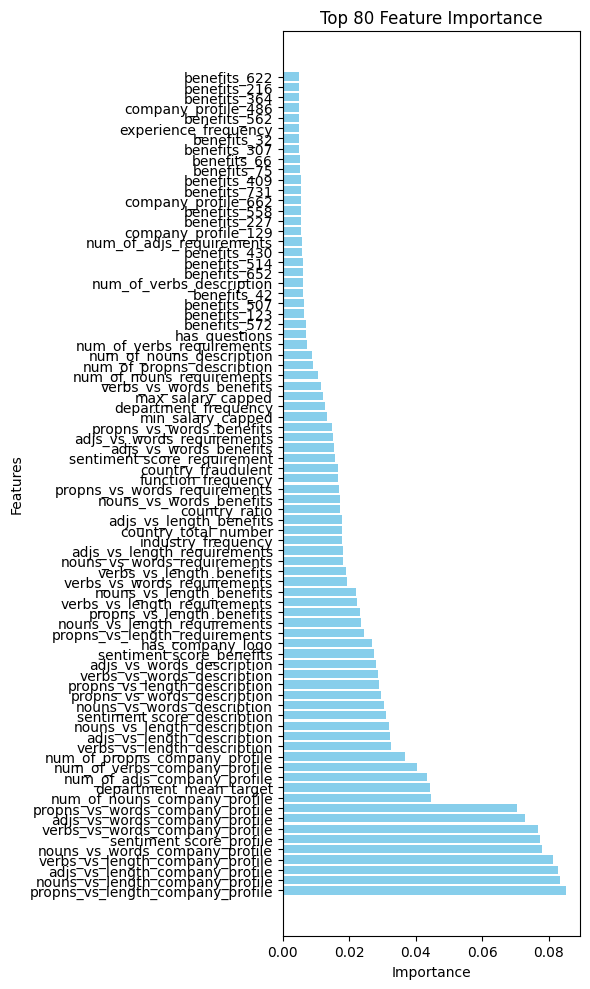

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 10))
plt.barh(feature_importance_df['Feature'][:80], feature_importance_df['Importance'][:80], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 80 Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation between each feature and the target
correlation_with_target = X_train.apply(lambda col: col.corr(y_train['fraudulent']))
correlation_df = pd.DataFrame(list(correlation_with_target.items()), columns=['Feature', 'Correlation'])
correlation_df['abs_correlation'] = correlation_df['Correlation'].abs()
# Sort the DataFrame by correlation values in descending order
correlation_df = correlation_df.sort_values(by='abs_correlation', ascending=False)

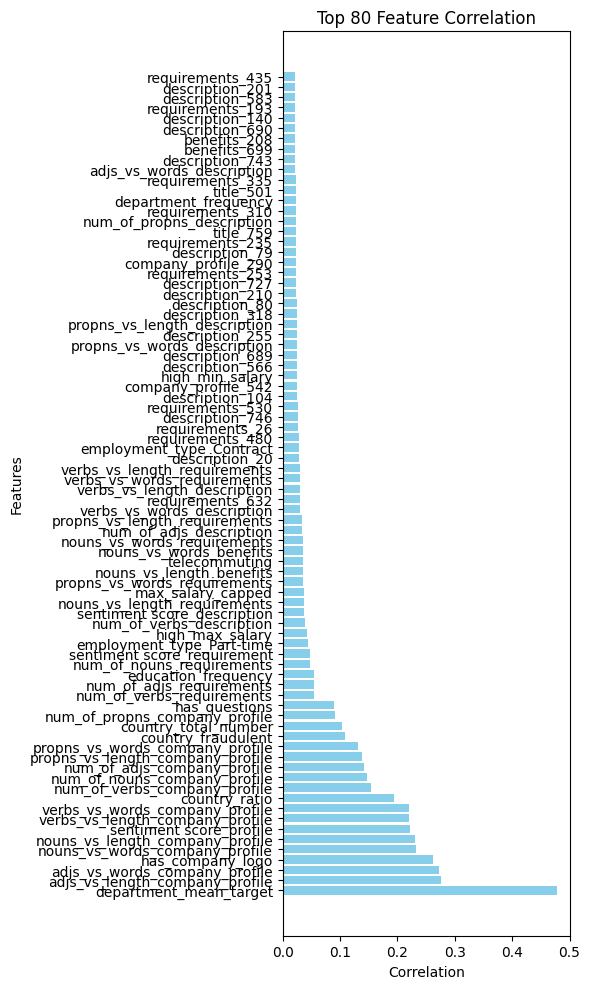

In [ ]:
plt.figure(figsize=(6, 10))
plt.barh(correlation_df['Feature'][:80], correlation_df['abs_correlation'][:80], color='skyblue')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Top 80 Feature Correlation')
plt.tight_layout()
plt.show()

In [ ]:
feature_importance_df.to_csv('/content/drive/My Drive/BT4012 Group 06/Data/feature_importance.csv', index=False)

In [ ]:
combined_train = pd.concat([X_train, y_train], axis=1)
non_embedded_test_df = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/test_non_embedded.csv', index_col=None)
y_test = non_embedded_test_df['fraudulent']
non_embedded_test_df = non_embedded_test_df.drop(columns=['fraudulent'])
X_test = pd.concat([non_embedded_test_df,X_test_embedded],axis = 1)
combined_test = pd.concat([X_test,y_test], axis = 1)

In [ ]:
combined_train.to_csv('/content/drive/My Drive/BT4012 Group 06/Data/combined_train.csv', index=False)

In [ ]:
combined_test.to_csv('/content/drive/My Drive/BT4012 Group 06/Data/combined_test.csv', index=False)

<h1>Word Embedding vs Sentence Embedding

In [ ]:
new_train = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/train_bert_embedding_w_jobid.csv')
new_test = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/test_bert_embedding_w_jobid.csv')

In [ ]:
new_X_train_embedded = new_train.iloc[:,76:]
new_y_train = new_train[['fraudulent']]

In [ ]:
new_X_train_embedded

,benefit1,benefit2,benefit3,benefit4,benefit5,benefit6,benefit7,benefit8,benefit9,benefit10,...,requirement759,requirement760,requirement761,requirement762,requirement763,requirement764,requirement765,requirement766,requirement767,requirement768
0,0.008247,0.109589,0.438910,-0.099352,0.273678,-0.086118,0.049532,0.504390,0.031703,-0.295990,...,-0.167115,-0.206595,0.087953,-0.391113,-0.06382,-0.088465,-0.131694,-0.234339,0.194257,-0.060869
1,0.089630,-0.023268,-0.521870,0.198188,0.264533,-0.160883,0.316056,-0.042822,-0.221250,-0.188934,...,-0.167115,-0.206595,0.087953,-0.391113,-0.06382,-0.088465,-0.131694,-0.234339,0.194257,-0.060869
2,-0.087028,-0.156565,-0.054346,0.002968,0.187784,-0.359634,0.180980,0.266206,-0.044730,-0.251742,...,-0.167115,-0.206595,0.087953,-0.391113,-0.06382,-0.088465,-0.131694,-0.234339,0.194257,-0.060869
3,-0.232986,0.177924,0.435428,0.054637,0.248077,-0.338217,0.052418,0.400856,-0.216694,-0.198539,...,-0.167115,-0.206595,0.087953,-0.391113,-0.06382,-0.088465,-0.131694,-0.234339,0.194257,-0.060869
4,0.241288,-0.088622,0.519199,0.084994,0.355692,-0.226689,0.217930,0.700504,-0.081570,-0.271641,...,-0.167115,-0.206595,0.087953,-0.391113,-0.06382,-0.088465,-0.131694,-0.234339,0.194257,-0.060869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,0.089630,-0.023268,-0.521870,0.198188,0.264533,-0.160883,0.316056,-0.042822,-0.221250,-0.188934,...,-0.167115,-0.206595,0.087953,-0.391113,-0.06382,-0.088465,-0.131694,-0.234339,0.194257,-0.060869
14300,0.200059,0.155912,0.361767,-0.159203,0.229271,-0.179346,0.146498,0.730118,0.022886,-0.488108,...,-0.167115,-0.206595,0.087953,-0.391113,-0.06382,-0.088465,-0.131694,-0.234339,0.194257,-0.060869
14301,0.074371,-0.087908,0.657618,-0.026925,0.602711,0.017344,-0.054139,0.257505,-0.289555,-0.042124,...,-0.167115,-0.206595,0.087953,-0.391113,-0.06382,-0.088465,-0.131694,-0.234339,0.194257,-0.060869
14302,0.089630,-0.023268,-0.521870,0.198188,0.264533,-0.160883,0.316056,-0.042822,-0.221250,-0.188934,...,-0.167115,-0.206595,0.087953,-0.391113,-0.06382,-0.088465,-0.131694,-0.234339,0.194257,-0.060869


In [ ]:
# Calculate the correlation between each feature and the target
new_correlation_embedded_df = pd.DataFrame(list(new_X_train_embedded.apply(lambda col: col.corr(new_y_train['fraudulent'])).items()), columns=['Feature', 'Correlation'])
new_correlation_embedded_df['abs_correlation'] = new_correlation_embedded_df['Correlation'].abs()
# Sort the DataFrame by correlation values in descending order
new_correlation_embedded_df = new_correlation_embedded_df.sort_values(by='abs_correlation', ascending=False)

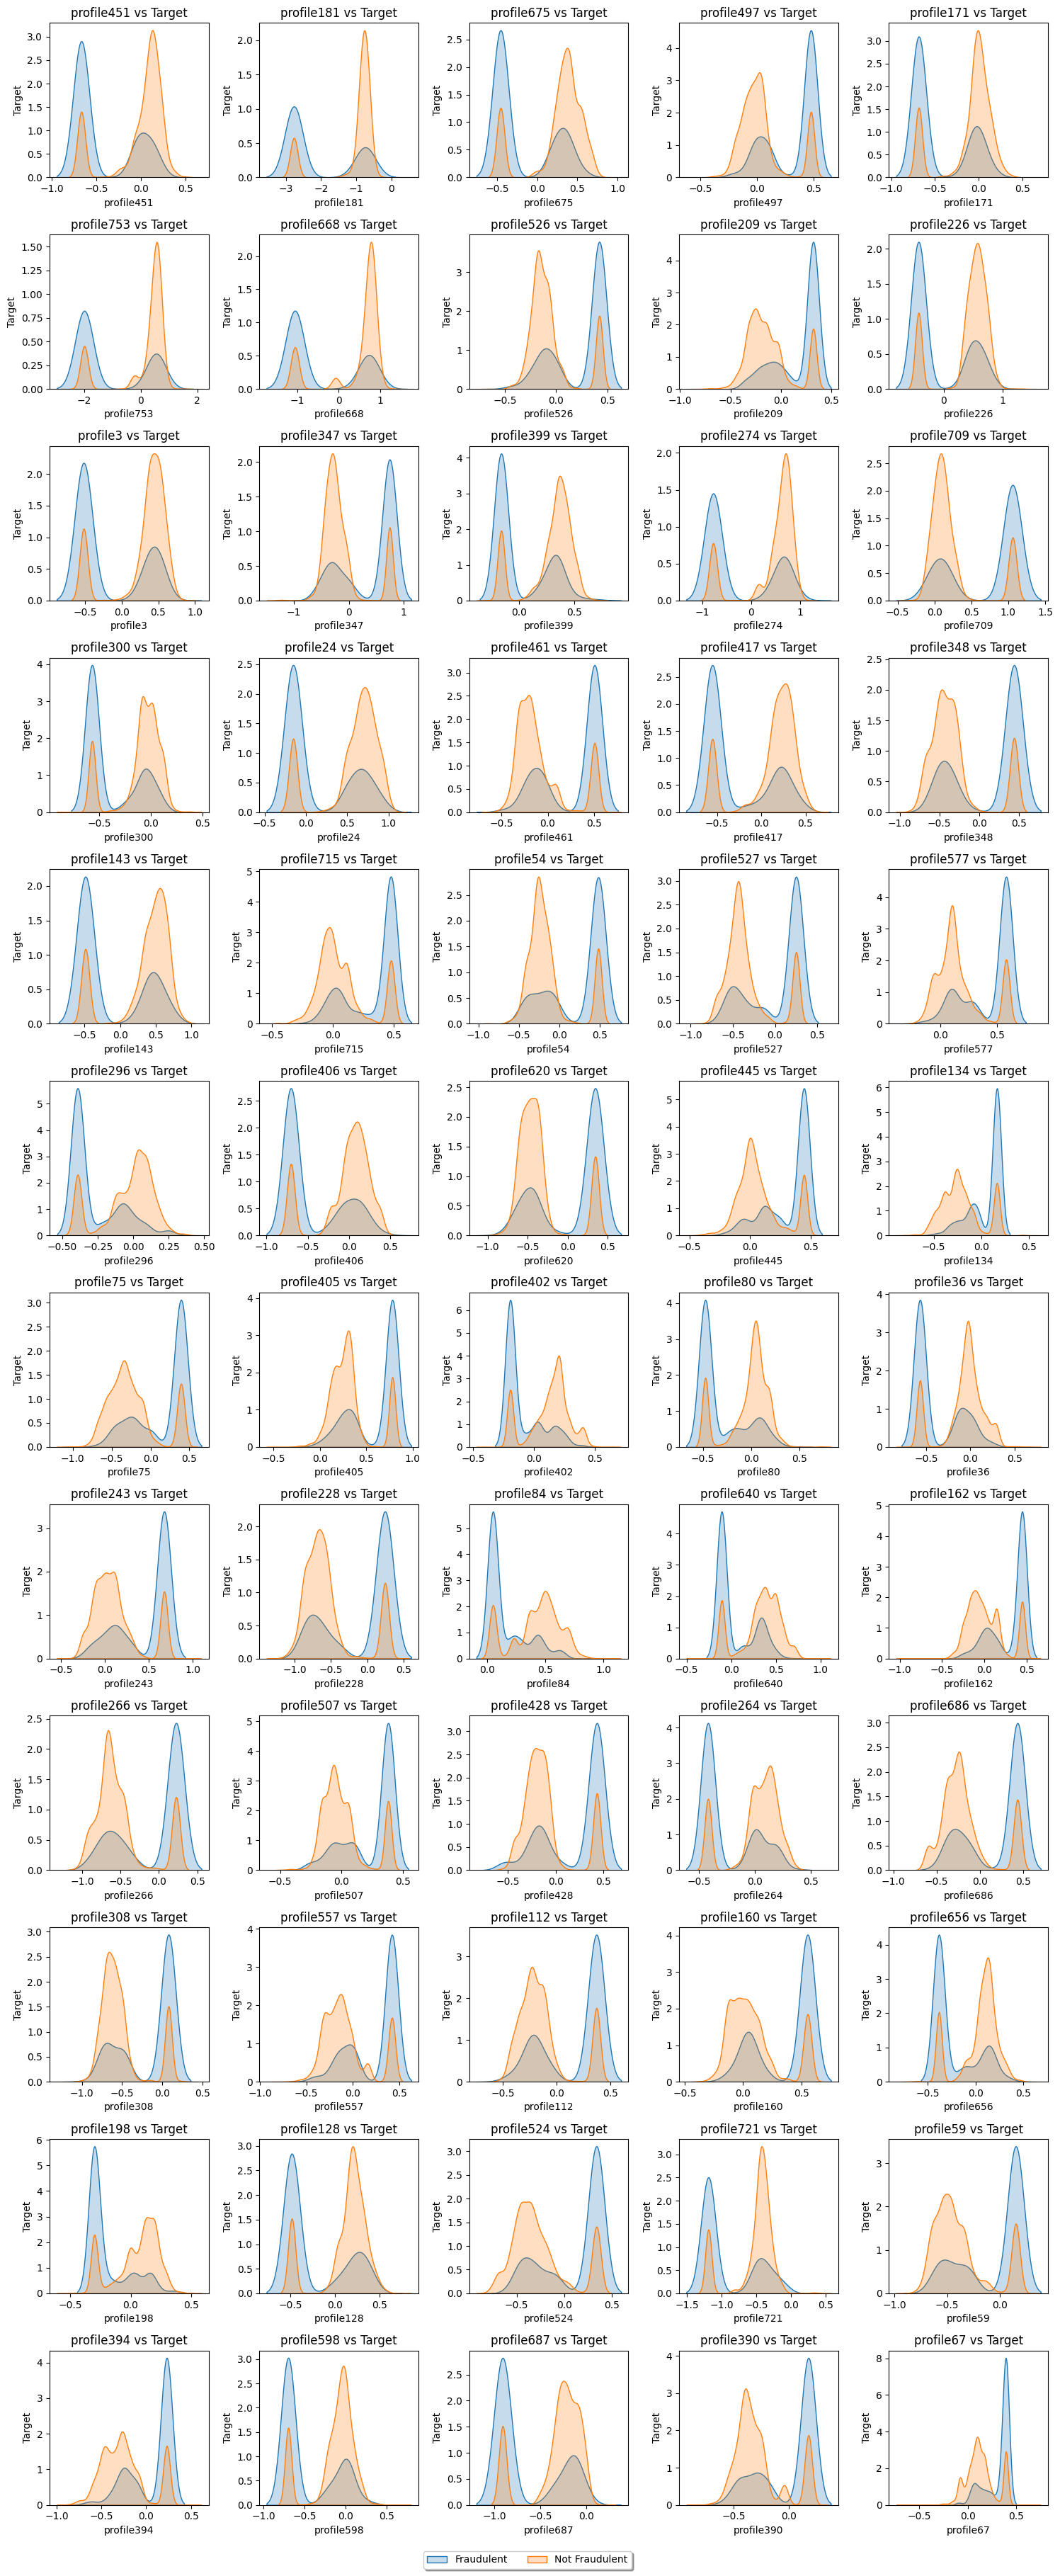

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = new_correlation_embedded_df[0:60]['Feature']
num_plots = len(features_to_plot)
num_rows = (num_plots + 4) // 5  # 5 plots in each row

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting
for i, feature in enumerate(features_to_plot):
    sns.kdeplot(new_train[new_train['fraudulent'] == 1][feature], fill=True, ax=axes[i], label='Fraudulent')
    sns.kdeplot(new_train[new_train['fraudulent'] == 0][feature], fill=True, ax=axes[i], label='Not Fraudulent')

    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

# Remove empty subplots
for j in range(num_plots, num_rows * 5):
    fig.delaxes(axes[j])

# Get handles and labels for all subplots
handles, labels = axes[0].get_legend_handles_labels()

# Create a single legend for all subplots using the handles and labels from the first subplot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=2)

plt.tight_layout()
plt.show()


<h1> TF-IDF Features

In [ ]:
# get tfidf features
tfidf_df = pd.read_csv('/content/drive/My Drive/BT4012 Group 06/Data/TF_IDF/merged_train.csv', index_col=None)

In [ ]:
X_train = tfidf_df.iloc[:,:1000]

In [ ]:
X_train

,10,100,12,20,200,30,401k,50,90,ability,...,writing,written,year,years,york,you,youll,young,youre,και
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,0.000000,0.065422,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.071508,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.025853,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.000000,0.000000,0.0,0.057477,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.092689,0.000000,0.000000,0.0,0.052533,0.000000,0.0,0.000000,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.118772,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,0.173552,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.072471,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
14300,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.086902,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
14301,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.033009,...,0.000000,0.000000,0.025351,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
14302,0.000000,0.000000,0.0,0.000000,0.0,0.073247,0.000000,0.082713,0.0,0.000000,...,0.000000,0.000000,0.065791,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
# Calculate the correlation between each feature and the target
new_correlation_embedded_df_tfidf = pd.DataFrame(list(X_train.apply(lambda col: col.corr(tfidf_df['fraudulent'])).items()), columns=['Feature', 'Correlation'])
new_correlation_embedded_df_tfidf['abs_correlation'] = new_correlation_embedded_df_tfidf['Correlation'].abs()
# Sort the DataFrame by correlation values in descending order
new_correlation_embedded_df_tfidf = new_correlation_embedded_df_tfidf.sort_values(by='abs_correlation', ascending=False)

In [ ]:
merged_train = pd.concat([X_train, tfidf_df[['fraudulent']]], axis=1)

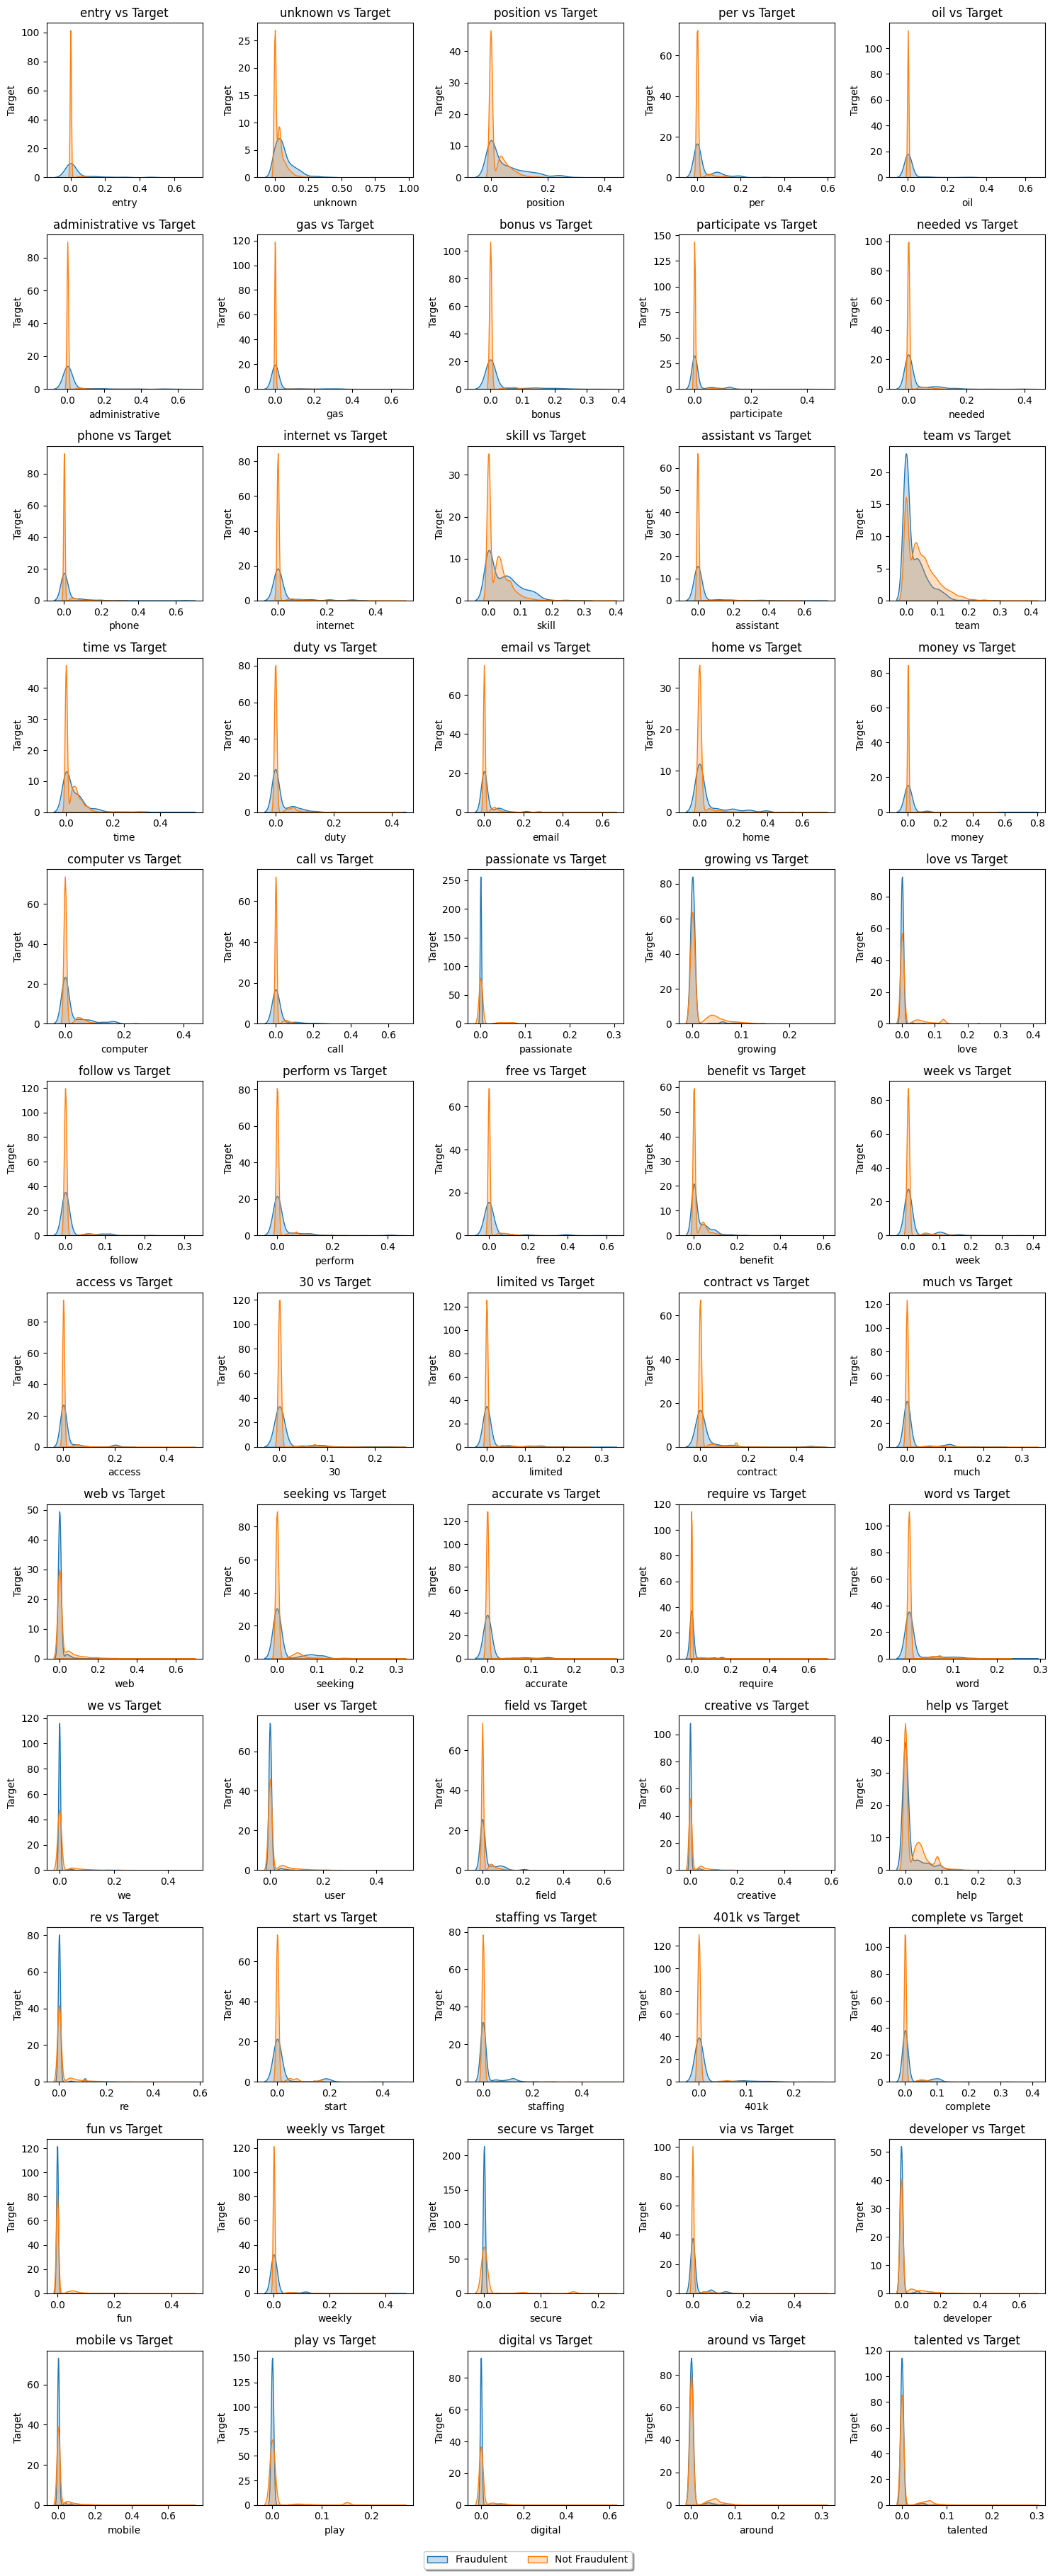

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = new_correlation_embedded_df_tfidf[0:60]['Feature']
num_plots = len(features_to_plot)
num_rows = (num_plots + 4) // 5  # 5 plots in each row

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting
for i, feature in enumerate(features_to_plot):
    sns.kdeplot(merged_train[merged_train['fraudulent'] == 1][feature], fill=True, ax=axes[i], label='Fraudulent')
    sns.kdeplot(merged_train[merged_train['fraudulent'] == 0][feature], fill=True, ax=axes[i], label='Not Fraudulent')

    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

# Remove empty subplots
for j in range(num_plots, num_rows * 5):
    fig.delaxes(axes[j])

# Get handles and labels for all subplots
handles, labels = axes[0].get_legend_handles_labels()

# Create a single legend for all subplots using the handles and labels from the first subplot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=2)

plt.tight_layout()
plt.show()


<h1> Compare Three Embedding Methods

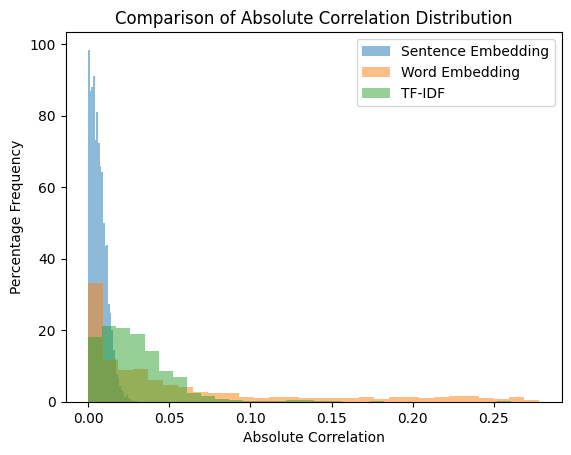

In [ ]:
# Extract the columns for comparison
col1 = correlation_embedded_df['abs_correlation']
col2 = new_correlation_embedded_df['abs_correlation']
col3 = new_correlation_embedded_df_tfidf['abs_correlation']
# Create a histogram for col1
plt.hist(col1, bins=30, alpha=0.5, label='Sentence Embedding', density=True)
# Create a histogram for col2
plt.hist(col2, bins=30, alpha=0.5, label='Word Embedding', density=True)
# Create a histogram for col3
plt.hist(col3, bins=30, alpha=0.5, label='TF-IDF', density=True)

# Add labels and title
plt.xlabel('Absolute Correlation')
plt.ylabel('Percentage Frequency')
plt.title('Comparison of Absolute Correlation Distribution')

# Add legend
plt.legend()

# Show the plot
plt.show()